In [1]:
GPT2_VERSION = 'gpt2'
FILTER = 'filtered'
SPLIT = 'dev'

In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winobias_data/attention_intervention_{GPT2_VERSION}_{FILTER}_{SPLIT}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 87
Mean total effect: 0.249

INDIRECT Effect (mean = 0.001355257761308259)
Top 10 heads:
   5 8: 0.055 (p=0.0000)
   5 10: 0.036 (p=0.0000)
   4 6: 0.032 (p=0.0000)
   5 9: 0.030 (p=0.0000)
   6 0: 0.014 (p=0.0000)
   4 3: 0.011 (p=0.0000)
   5 5: 0.006 (p=0.0003)
   7 1: 0.006 (p=0.0010)
   7 5: 0.002 (p=0.3137)
   7 8: 0.002 (p=0.3932)

DIRECT Effect (mean = 0.24795710541978502)
Top 10 heads:
   5 8: 0.193 (p=0.0136)
   5 10: 0.207 (p=0.0489)
   5 9: 0.218 (p=0.1128)
   4 6: 0.223 (p=0.1605)
   6 0: 0.234 (p=0.2801)
   7 1: 0.243 (p=0.4277)
   5 5: 0.244 (p=0.4315)
   4 3: 0.245 (p=0.4601)
   6 4: 0.247 (p=0.4830)
   7 8: 0.247 (p=0.4874)


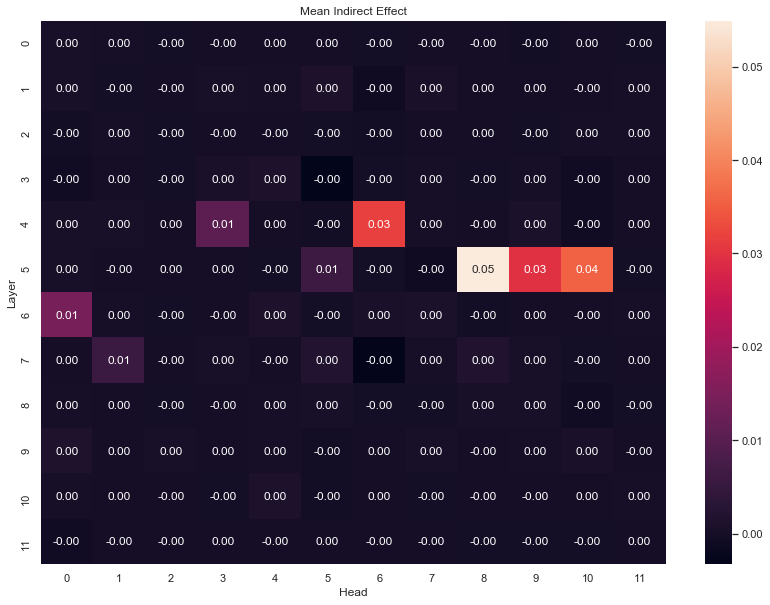

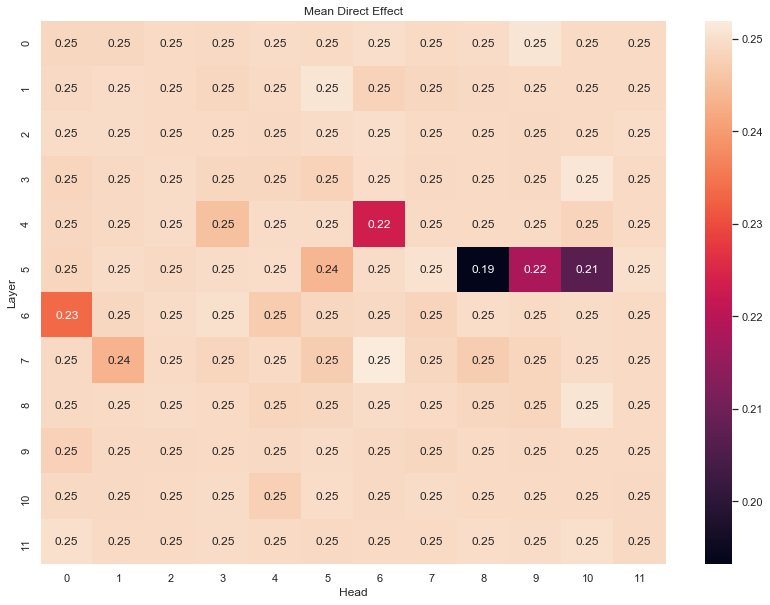

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 87
Mean total effect: 0.249


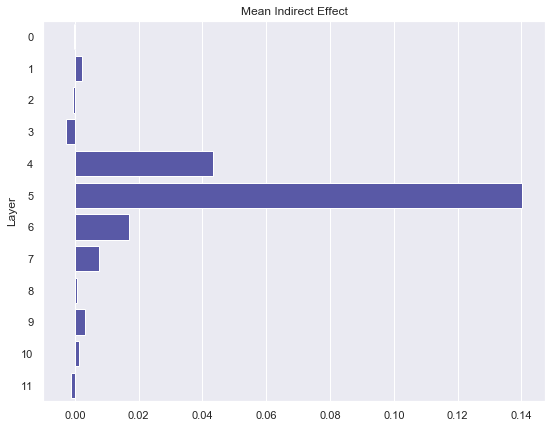

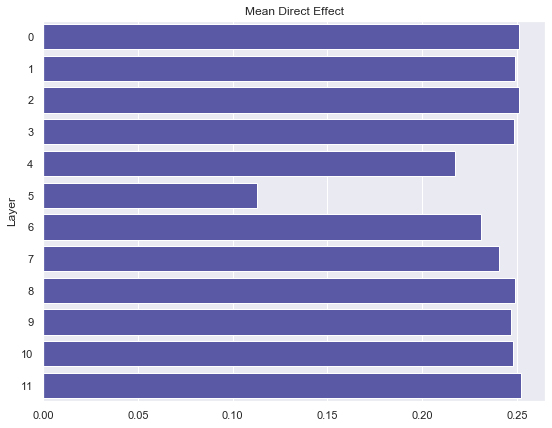

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.21893
p(c2|x') / p(c1|x') = 0.23095

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.055


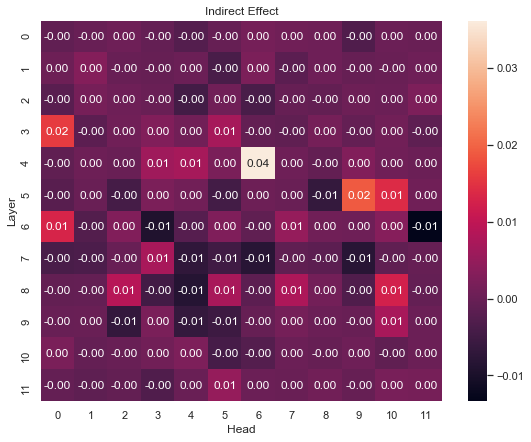

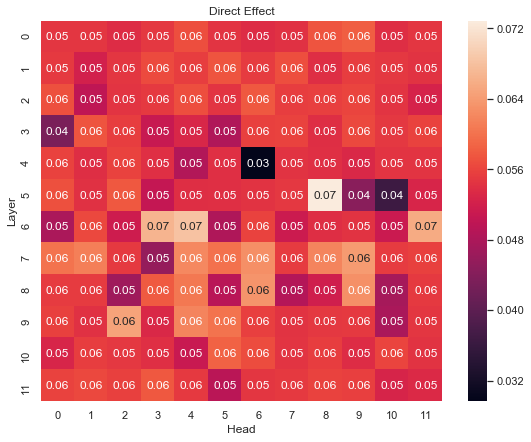

In [6]:
report_intervention(results[0])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.86830
p(c2|x') / p(c1|x') = 1.04329

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.202


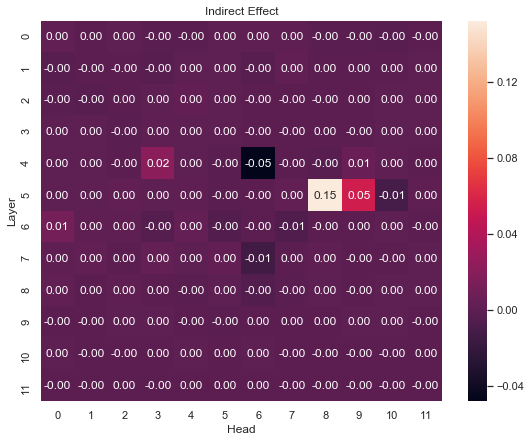

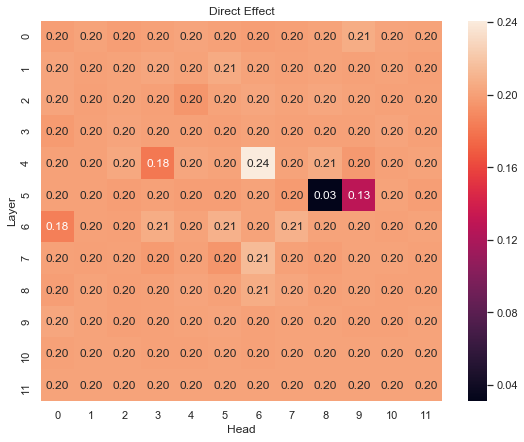

In [7]:
report_intervention(results[1])

x : The physician told the baker that she
x': The physician told the baker that he
c1: had cancer .
c2: tried the best .

p(c2|x) / p(c1|x) = 0.16555
p(c2|x') / p(c1|x') = 0.21632

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.307


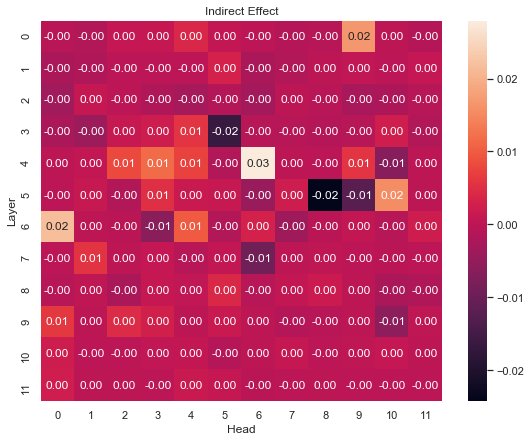

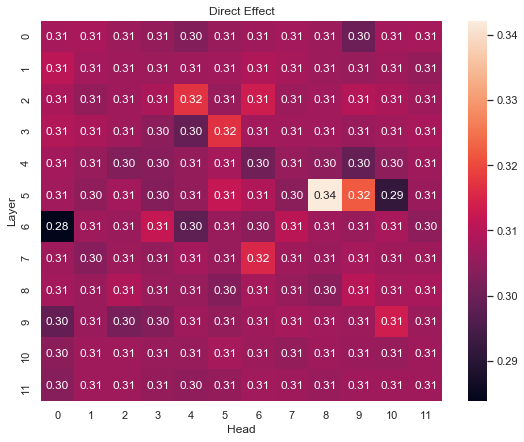

In [8]:
report_intervention(results[2])

x : The farmer offered apples to the housekeeper, because she
x': The farmer offered apples to the housekeeper, because he
c1: might like them .
c2: had too many of them .

p(c2|x) / p(c1|x) = 2.90503
p(c2|x') / p(c1|x') = 4.27356

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.471


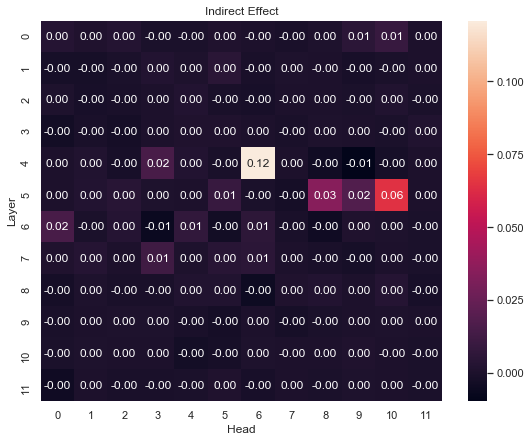

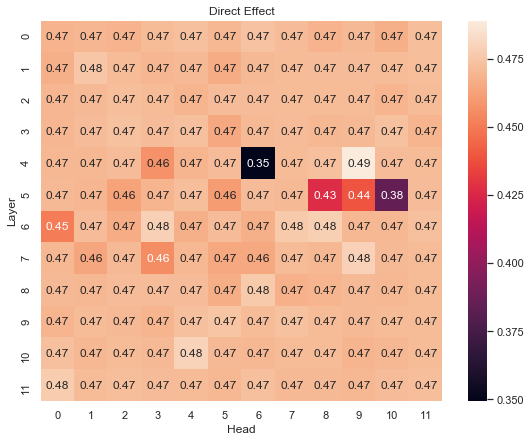

In [9]:
report_intervention(results[3])
